In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting directory

In [3]:
FIG_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/plots/exp3/"

# Args

In [4]:
ARGS = "-1t1"

# Load full data

In [5]:
FIL = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/kma/kma" + ARGS + "/output/mapping.frag.gz"

In [13]:
alt, sco, beg, end, gem = np.loadtxt(FIL, usecols=(1,2,3,4,9), unpack=True,
                                     dtype={'names':('alt','sco','beg','end','gem'), 'formats':('i4','i4','i4','i4','S23')})

In [32]:
np.dtype(gem, dtypes='str')

TypeError: 'dtypes' is an invalid keyword argument for array()

# Stats

In [29]:
np.char.strip(gem, b'BX:Z:')[0:10]

array([b'CAAGTTGAGTGCCATT-1', b'GGTATTGTCAGTGTTG-1',
       b'AACTCTTAGTACACCT-1', b'AAAGATGAGGGCTTGA-1',
       b'CGTGTAAAGACGCACA-1', b'GCAGCCATCCACGTGG-1',
       b'AACTGGTCATGCCTAA-1', b'CAGGTGCTCTCTGTCG-1',
       b'TGACGGCTCCGGCACA-1', b'CATCAGAGTCATCGGC-1'], dtype='|S23')

In [18]:
print("# Reads\t\t\t%i" %(19545908/4))
print("# Annotated reads\t%i" %len(alt))
print("# Passed reads\t\t%i" %(alt <= 15).sum())
print("# Unique GEMs\t\t%i" %len(set(gem)))

# Reads			4886477
# Annotated reads	250517
# Passed reads		247924
# Unique GEMs		8451


# Visualize mapping quality

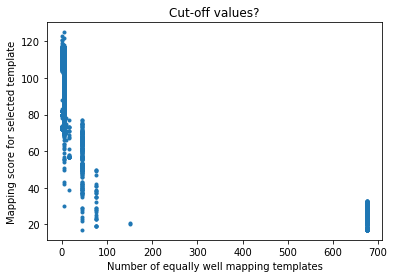

In [196]:
plt.plot(alt, sco, '.')
plt.xlabel("Number of equally well mapping templates")
plt.ylabel("Mapping score for selected template")
plt.title("Cut-off values?")
plt.savefig(FIG_DIR + "kma" + ARGS + "_score_vs_certainty.pdf")
plt.show()

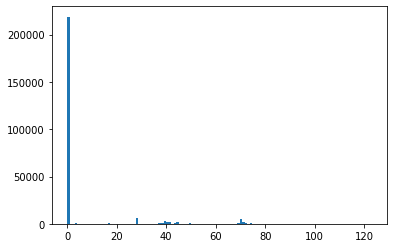

In [186]:
plt.hist(beg, bins=120)
plt.show()

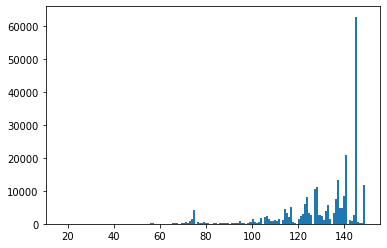

In [17]:
plt.hist(end_map-beg_map, bins=150)
plt.show()

# pMHC GEM intersection with TCR GEMs

In [19]:
tcr_file = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_TCR/processed/gem_filtration_lists/ready_for_use.lst"

In [30]:
tcr_gems = set(np.sort(np.loadtxt(tcr_file, dtype=np.str)))
mhc_gems = set(np.char.strip(gem, b'BX:Z:'))

In [31]:
len(np.intersect1d(tcr_gems, mhc_gems, assume_unique=True))

0

In [ ]:
from matplotlib_venn import venn2
c = intersection_types['grep_anneal_min_100bp'][9]
a = len(tcr_barcodes) - c
b = intersection_types['grep_anneal_min_100bp'][0]
# Make the diagram
venn2(subsets = (a, b, c), set_labels = ('TCR', 'MHC'))
plt.savefig(figs + "tcr-mhc_raw_venn.pdf")
#plt.title("Intersection supported by >10 reads")
plt.show()